
# Assignment No 4c
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

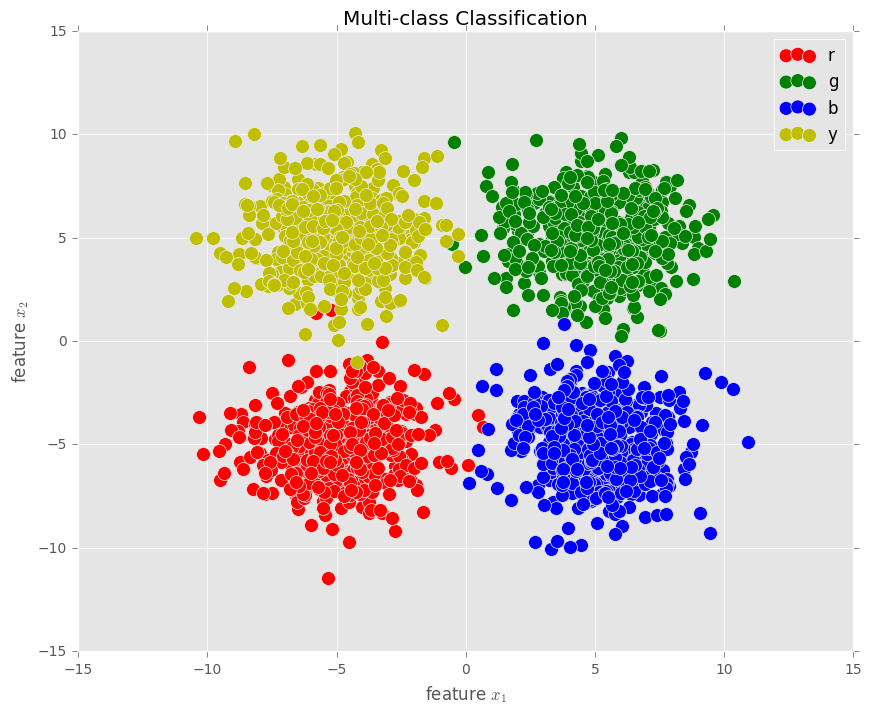

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))


In [19]:
import randomForest as rf
reload(rf)


<module 'randomForest' from 'randomForest.pyc'>

In [26]:
rfc=rf.RandomForest(weaklearner='Linear', ntrees=10, nsplits=100)

In [27]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [32]:
#%pdb
rfc.train(X,Y)

training new tree
creating left node = (1005, 2), right node = (995, 2)
creating left node = (504, 2), right node = (501, 2)
creating left node = (500, 2), right node = (495, 2)
training new tree
creating left node = (1000, 2), right node = (1000, 2)
creating left node = (505, 2), right node = (495, 2)
creating left node = (502, 2), right node = (498, 2)
training new tree
creating left node = (990, 2), right node = (1010, 2)
creating left node = (495, 2), right node = (495, 2)
creating left node = (503, 2), right node = (507, 2)
training new tree
creating left node = (1000, 2), right node = (1000, 2)
creating left node = (498, 2), right node = (502, 2)
creating left node = (496, 2), right node = (504, 2)
training new tree
creating left node = (1005, 2), right node = (995, 2)
creating left node = (506, 2), right node = (499, 2)
creating left node = (497, 2), right node = (498, 2)
training new tree
creating left node = (1010, 2), right node = (990, 2)
creating left node = (519, 2), right

In [33]:
len(rfc.trees)

10

In [34]:
#%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        498    0    2    0   500
2.0          0  500    0    0   500
3.0          2  142  355    1   500
4.0         18   14    0  468   500
All        518  656  357  469  2000

In [35]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

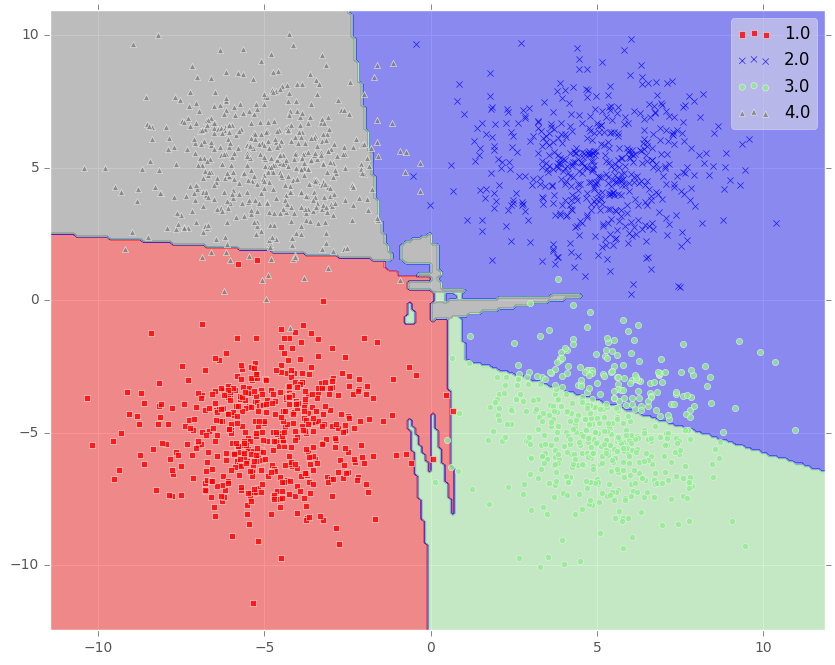

In [37]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [38]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        249    0    1    0   250
2.0          0  250    0    0   250
3.0          3   56  191    0   250
4.0         12   10    0  228   250
All        264  316  192  228  1000

In [39]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

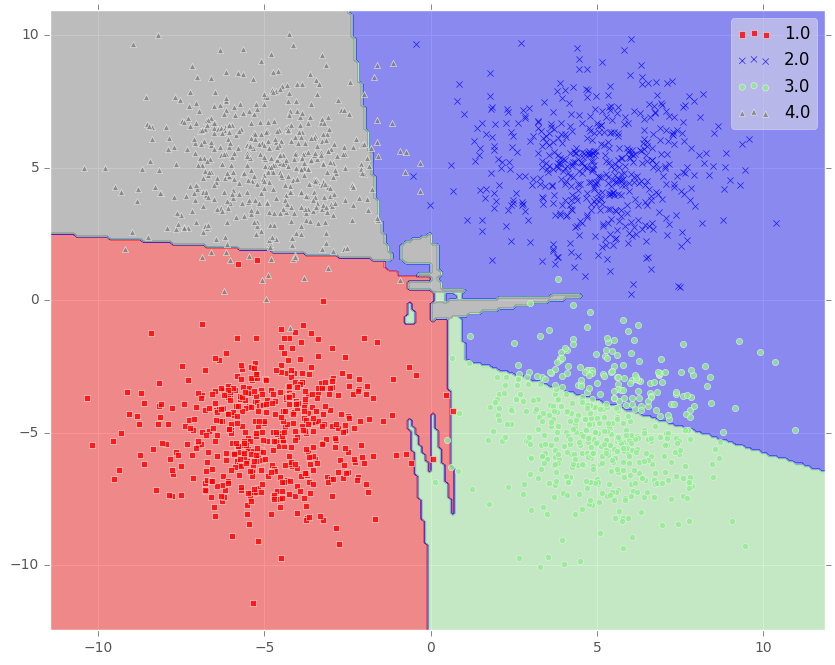

In [40]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned ON
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


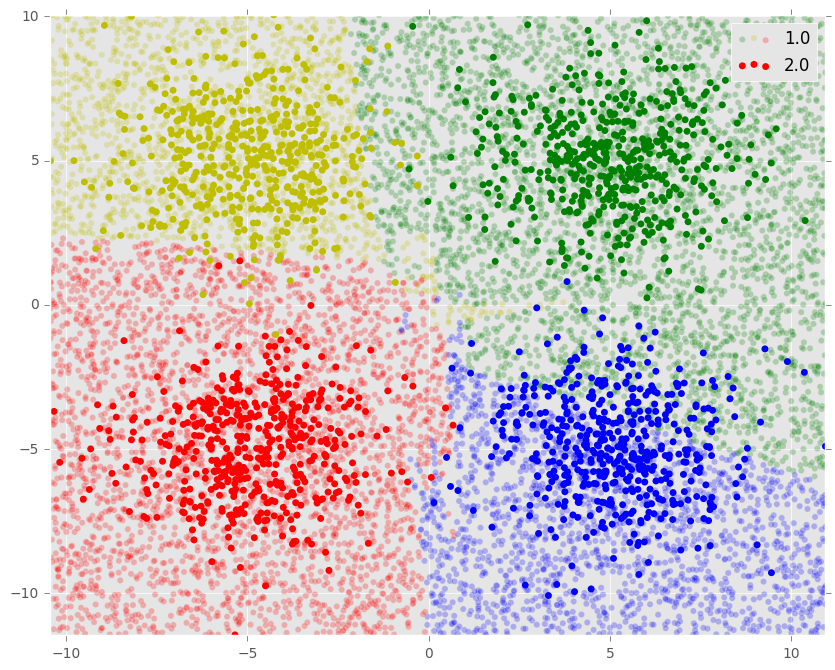

In [41]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

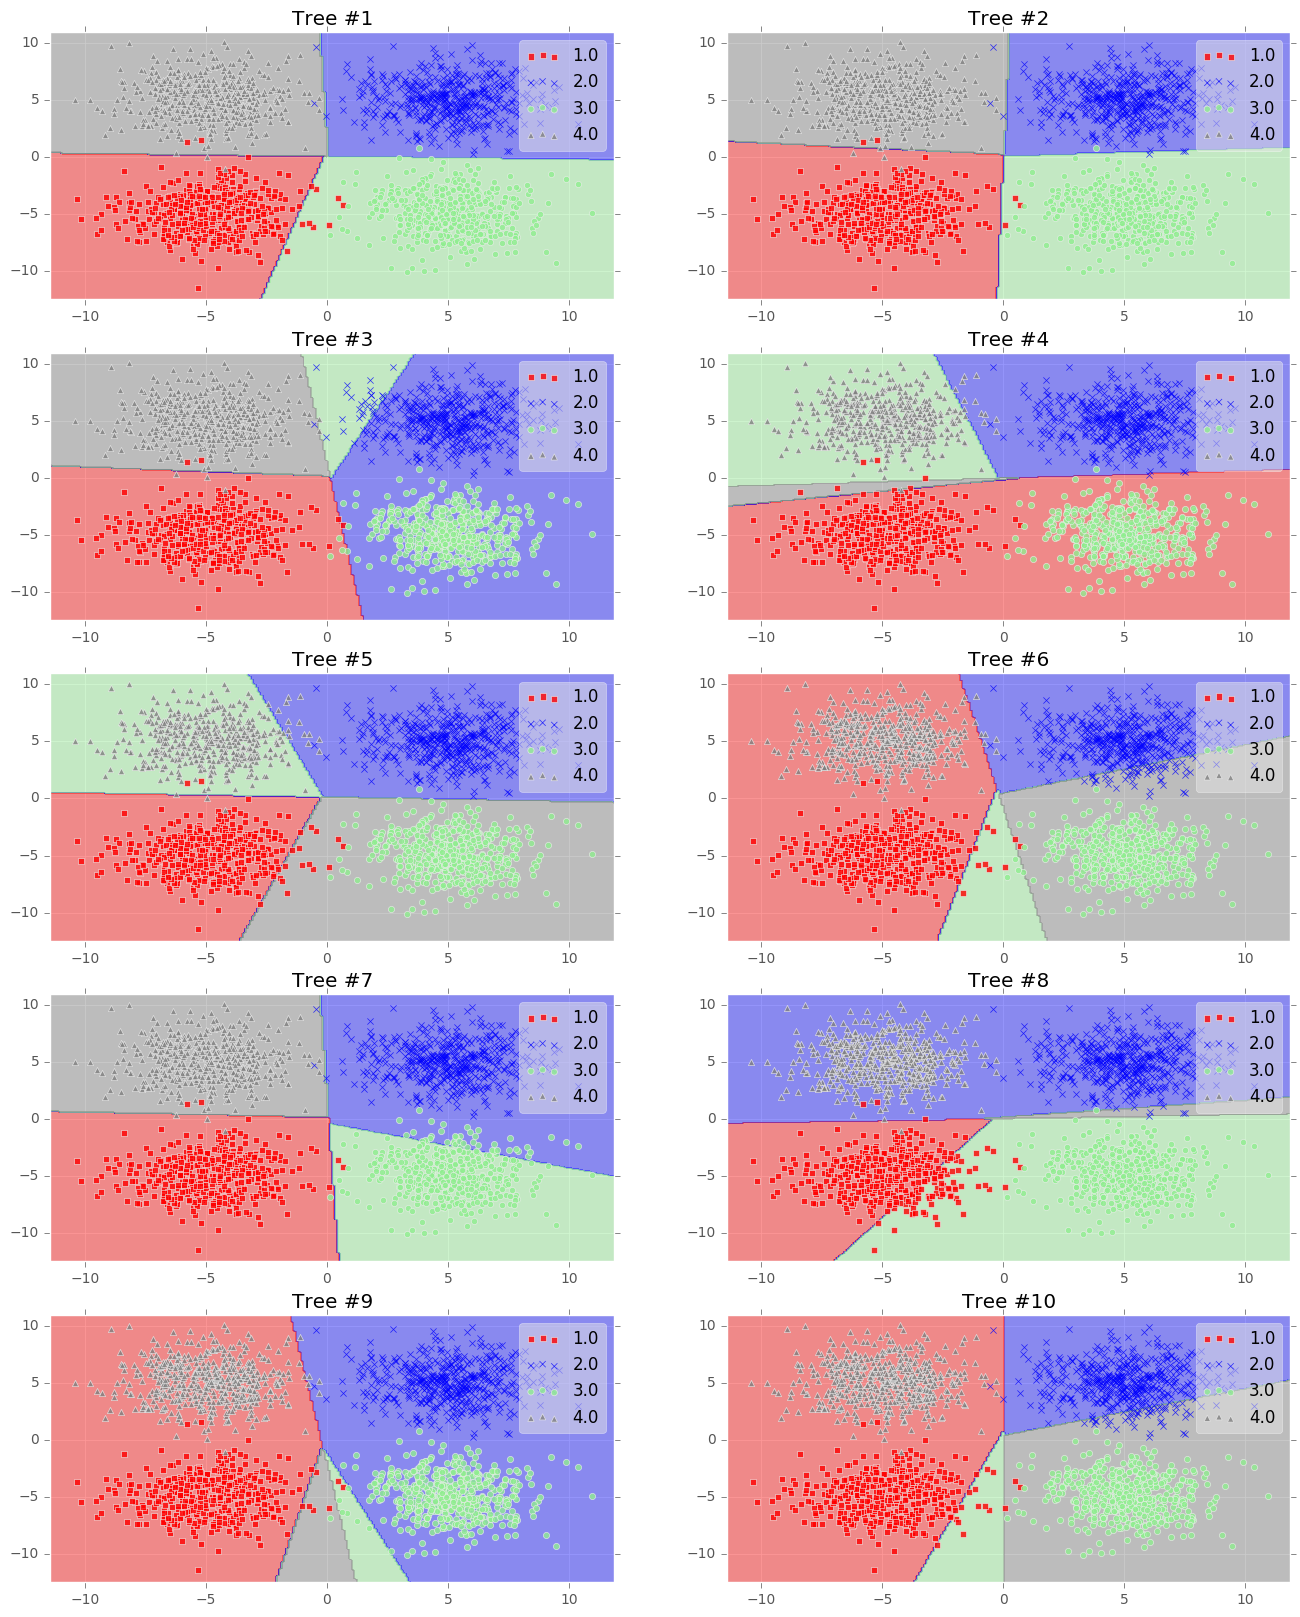

In [43]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

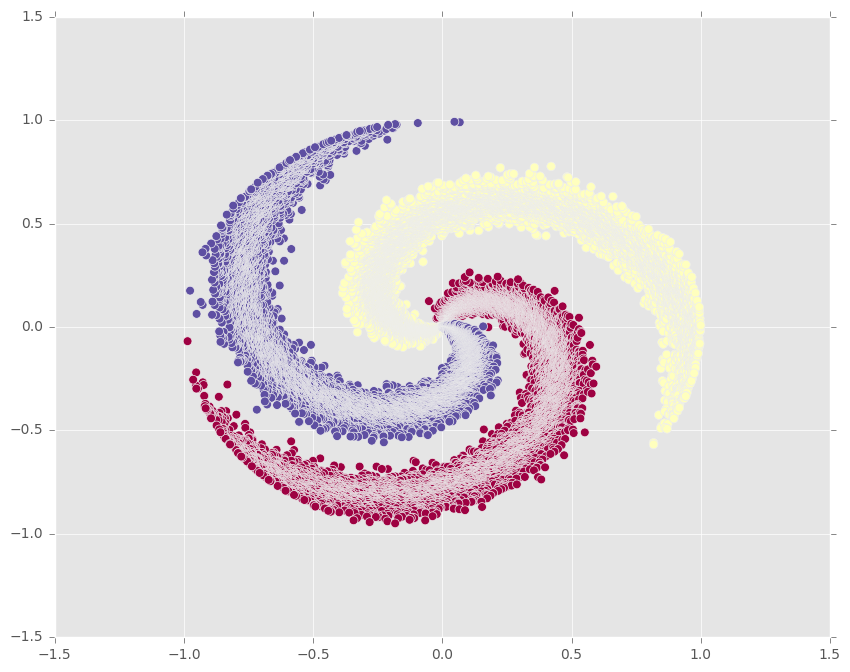

In [44]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [45]:
print X.shape, Y.shape

(30000, 2) (30000,)


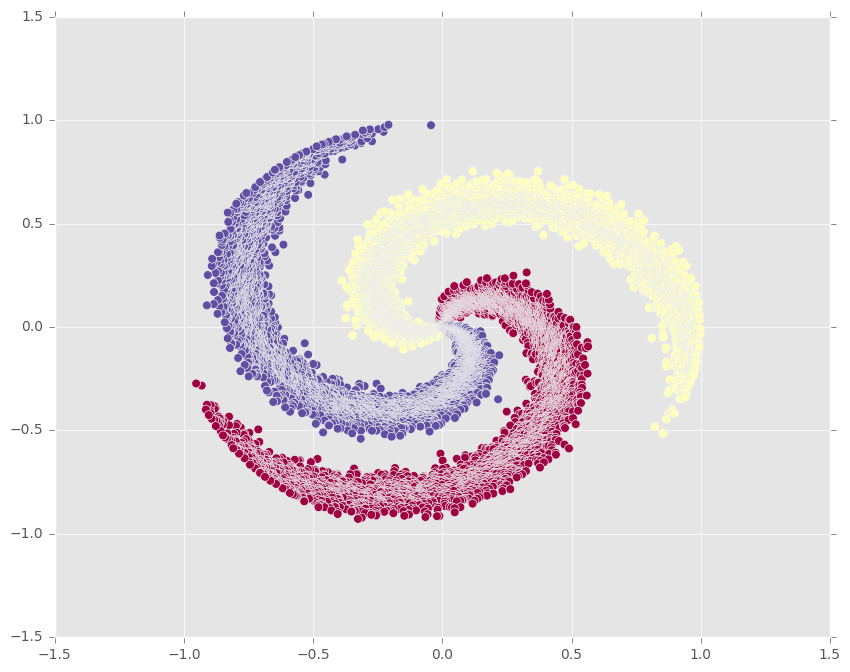

In [46]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [57]:
reload(rf)
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20, nsplits=200)
rfc.train(X,Y[:,np.newaxis])

training new tree
creating left node = (5310, 2), right node = (24690, 2)
creating left node = (4921, 2), right node = (389, 2)
creating left node = (5497, 2), right node = (19193, 2)
creating left node = (178, 2), right node = (5319, 2)
creating left node = (3564, 2), right node = (15629, 2)
creating left node = (5761, 2), right node = (9868, 2)
creating left node = (4142, 2), right node = (5726, 2)
creating left node = (3158, 2), right node = (984, 2)
creating left node = (3082, 2), right node = (76, 2)
creating left node = (4860, 2), right node = (866, 2)
training new tree
creating left node = (10519, 2), right node = (19481, 2)
creating left node = (6109, 2), right node = (4410, 2)
creating left node = (291, 2), right node = (5818, 2)
creating left node = (1471, 2), right node = (2939, 2)
creating left node = (1253, 2), right node = (218, 2)
creating left node = (1935, 2), right node = (17546, 2)
creating left node = (11365, 2), right node = (6181, 2)
creating left node = (8521, 2)

ValueError: zero-size array to reduction operation maximum which has no identity

In [58]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted    0.0  1.0    2.0    All
Actual                             
0           3948   87   5965  10000
1           3152  433   6415  10000
2           8575    0   1425  10000
All        15675  520  13805  30000

In [59]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted   0.0  1.0   2.0    All
Actual                           
0          1949   57  2994   5000
1          1583  221  3196   5000
2          4278    0   722   5000
All        7810  278  6912  15000

In [60]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0.0, 1.0, 2.0]


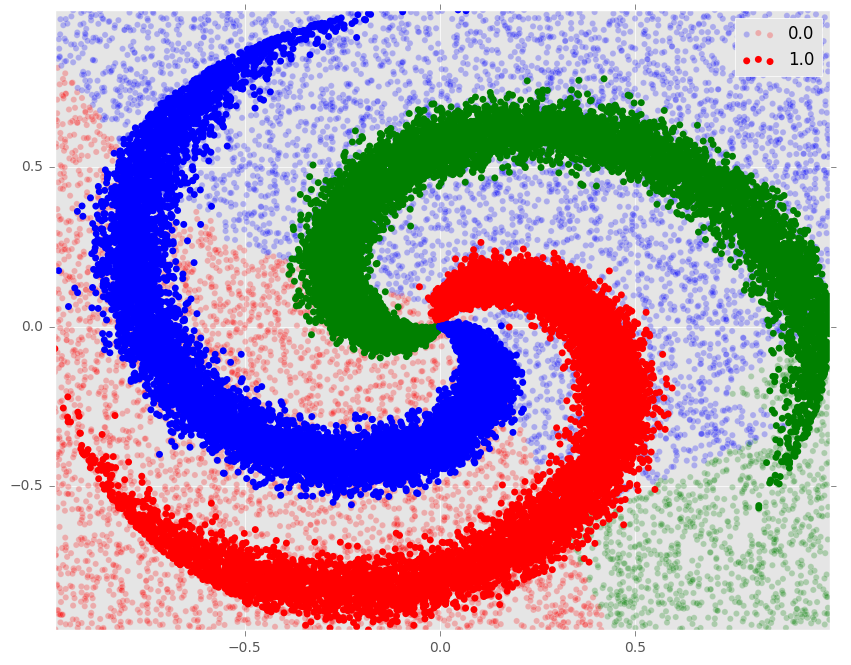

In [61]:
t.plot_points_range(rfc,X,Y)

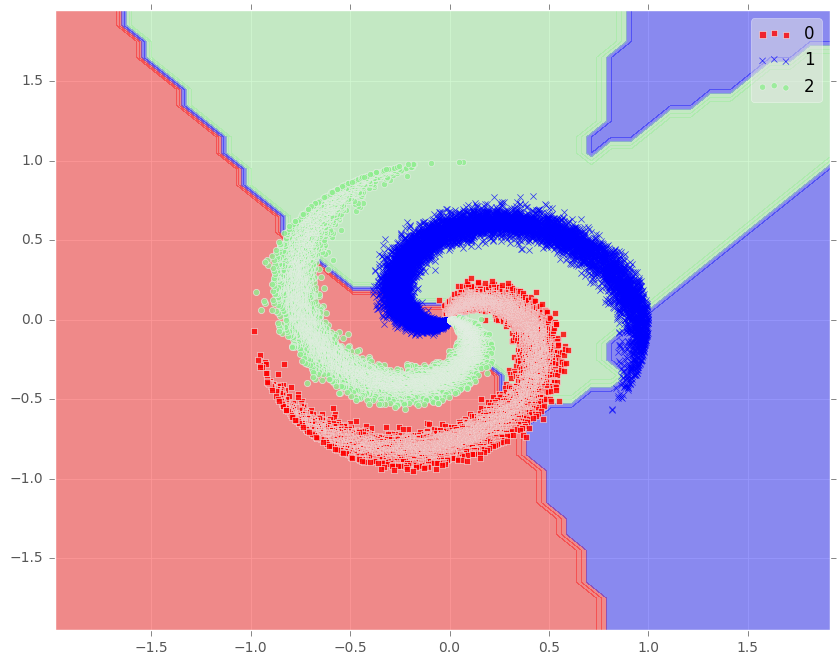

In [62]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

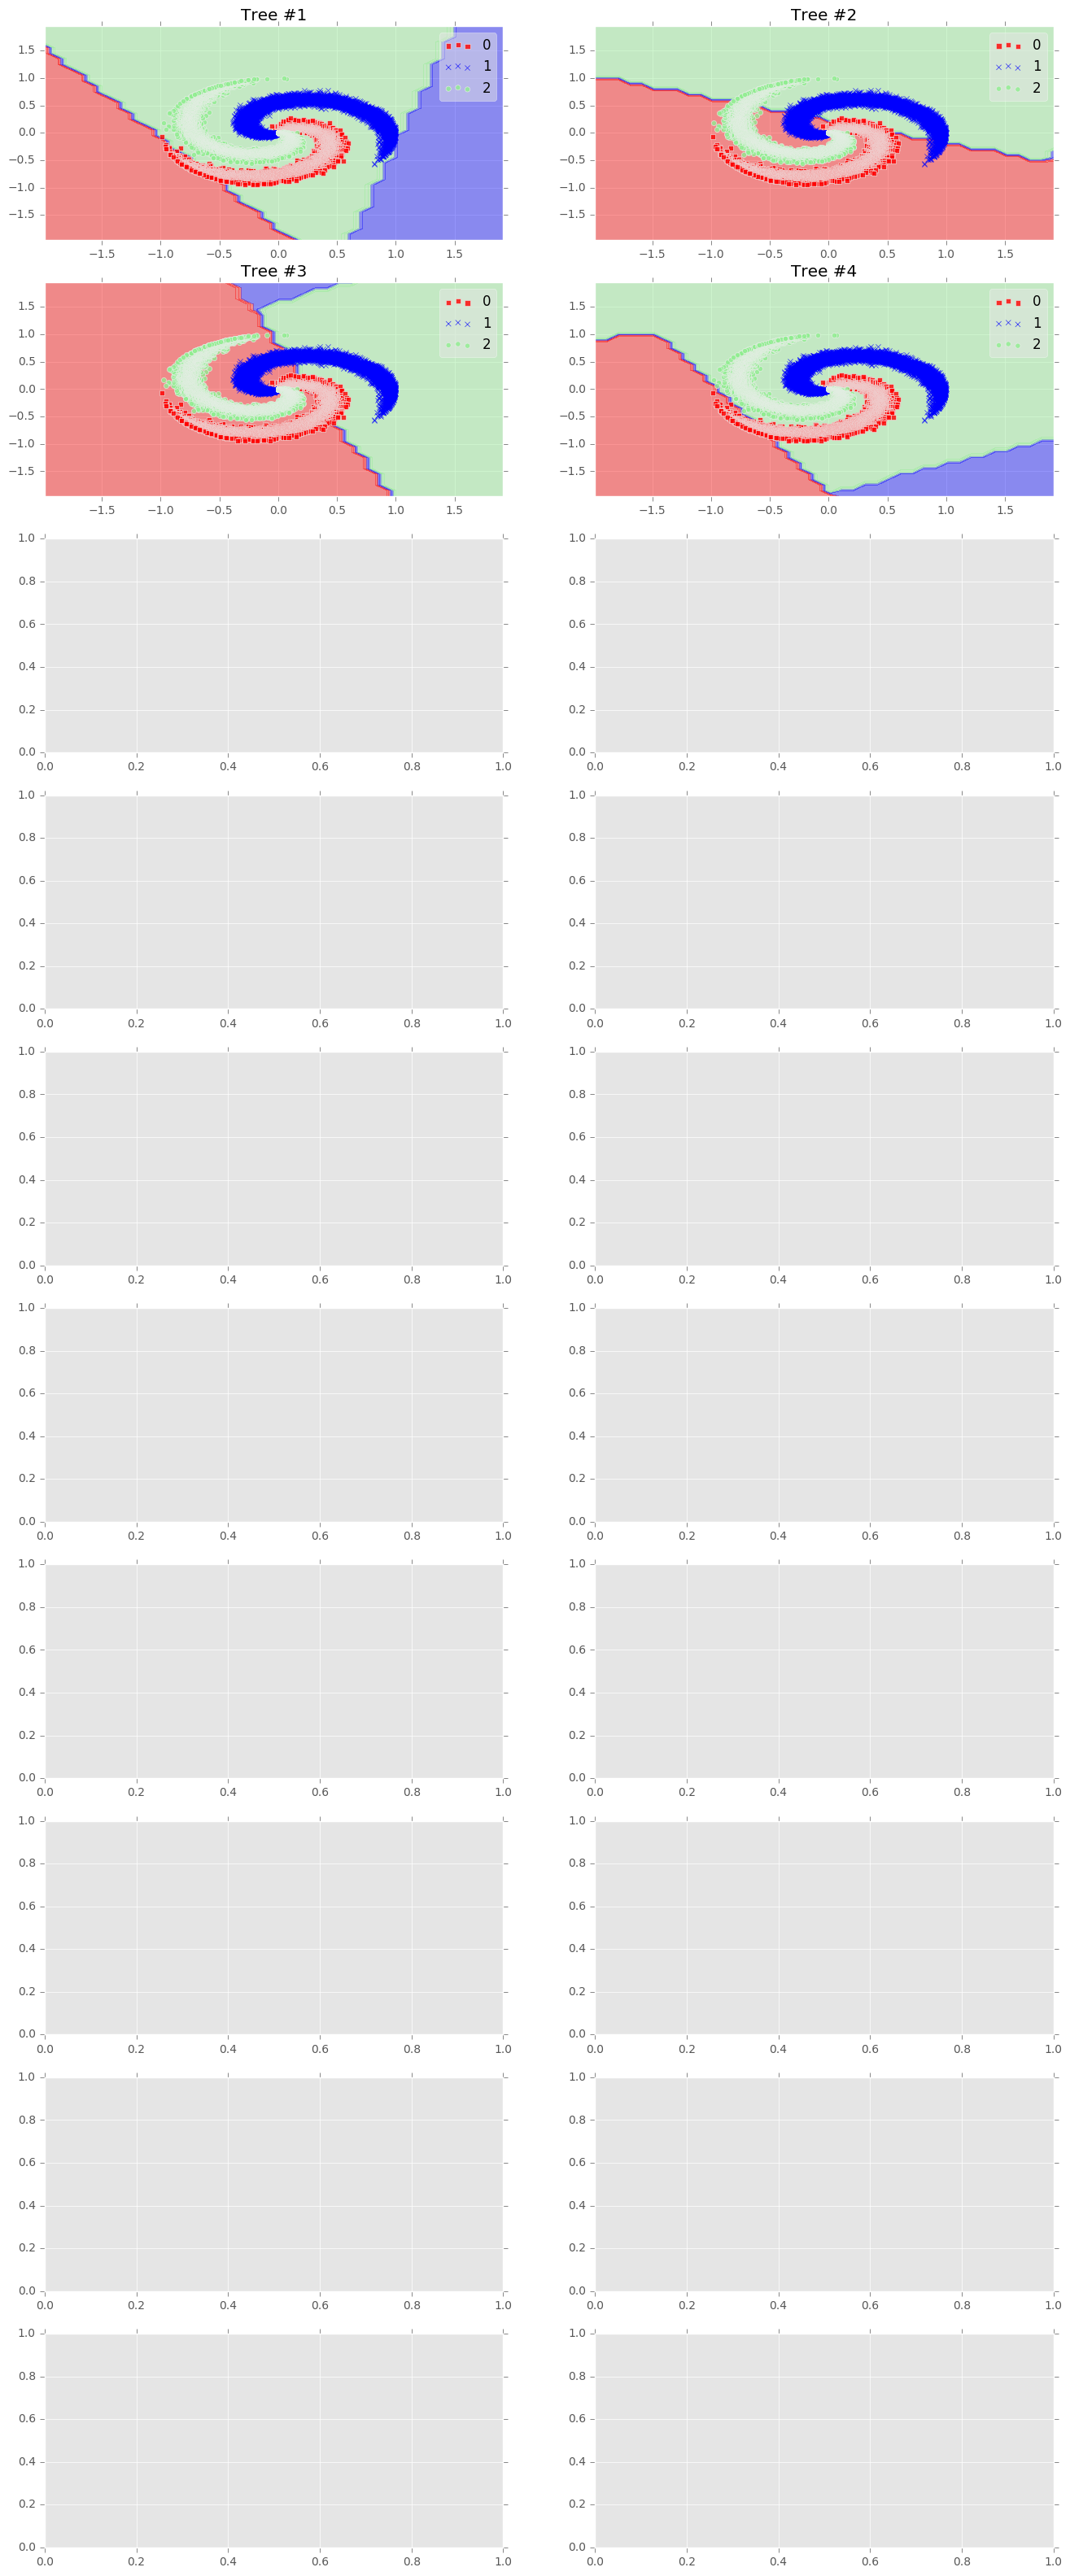

In [63]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...